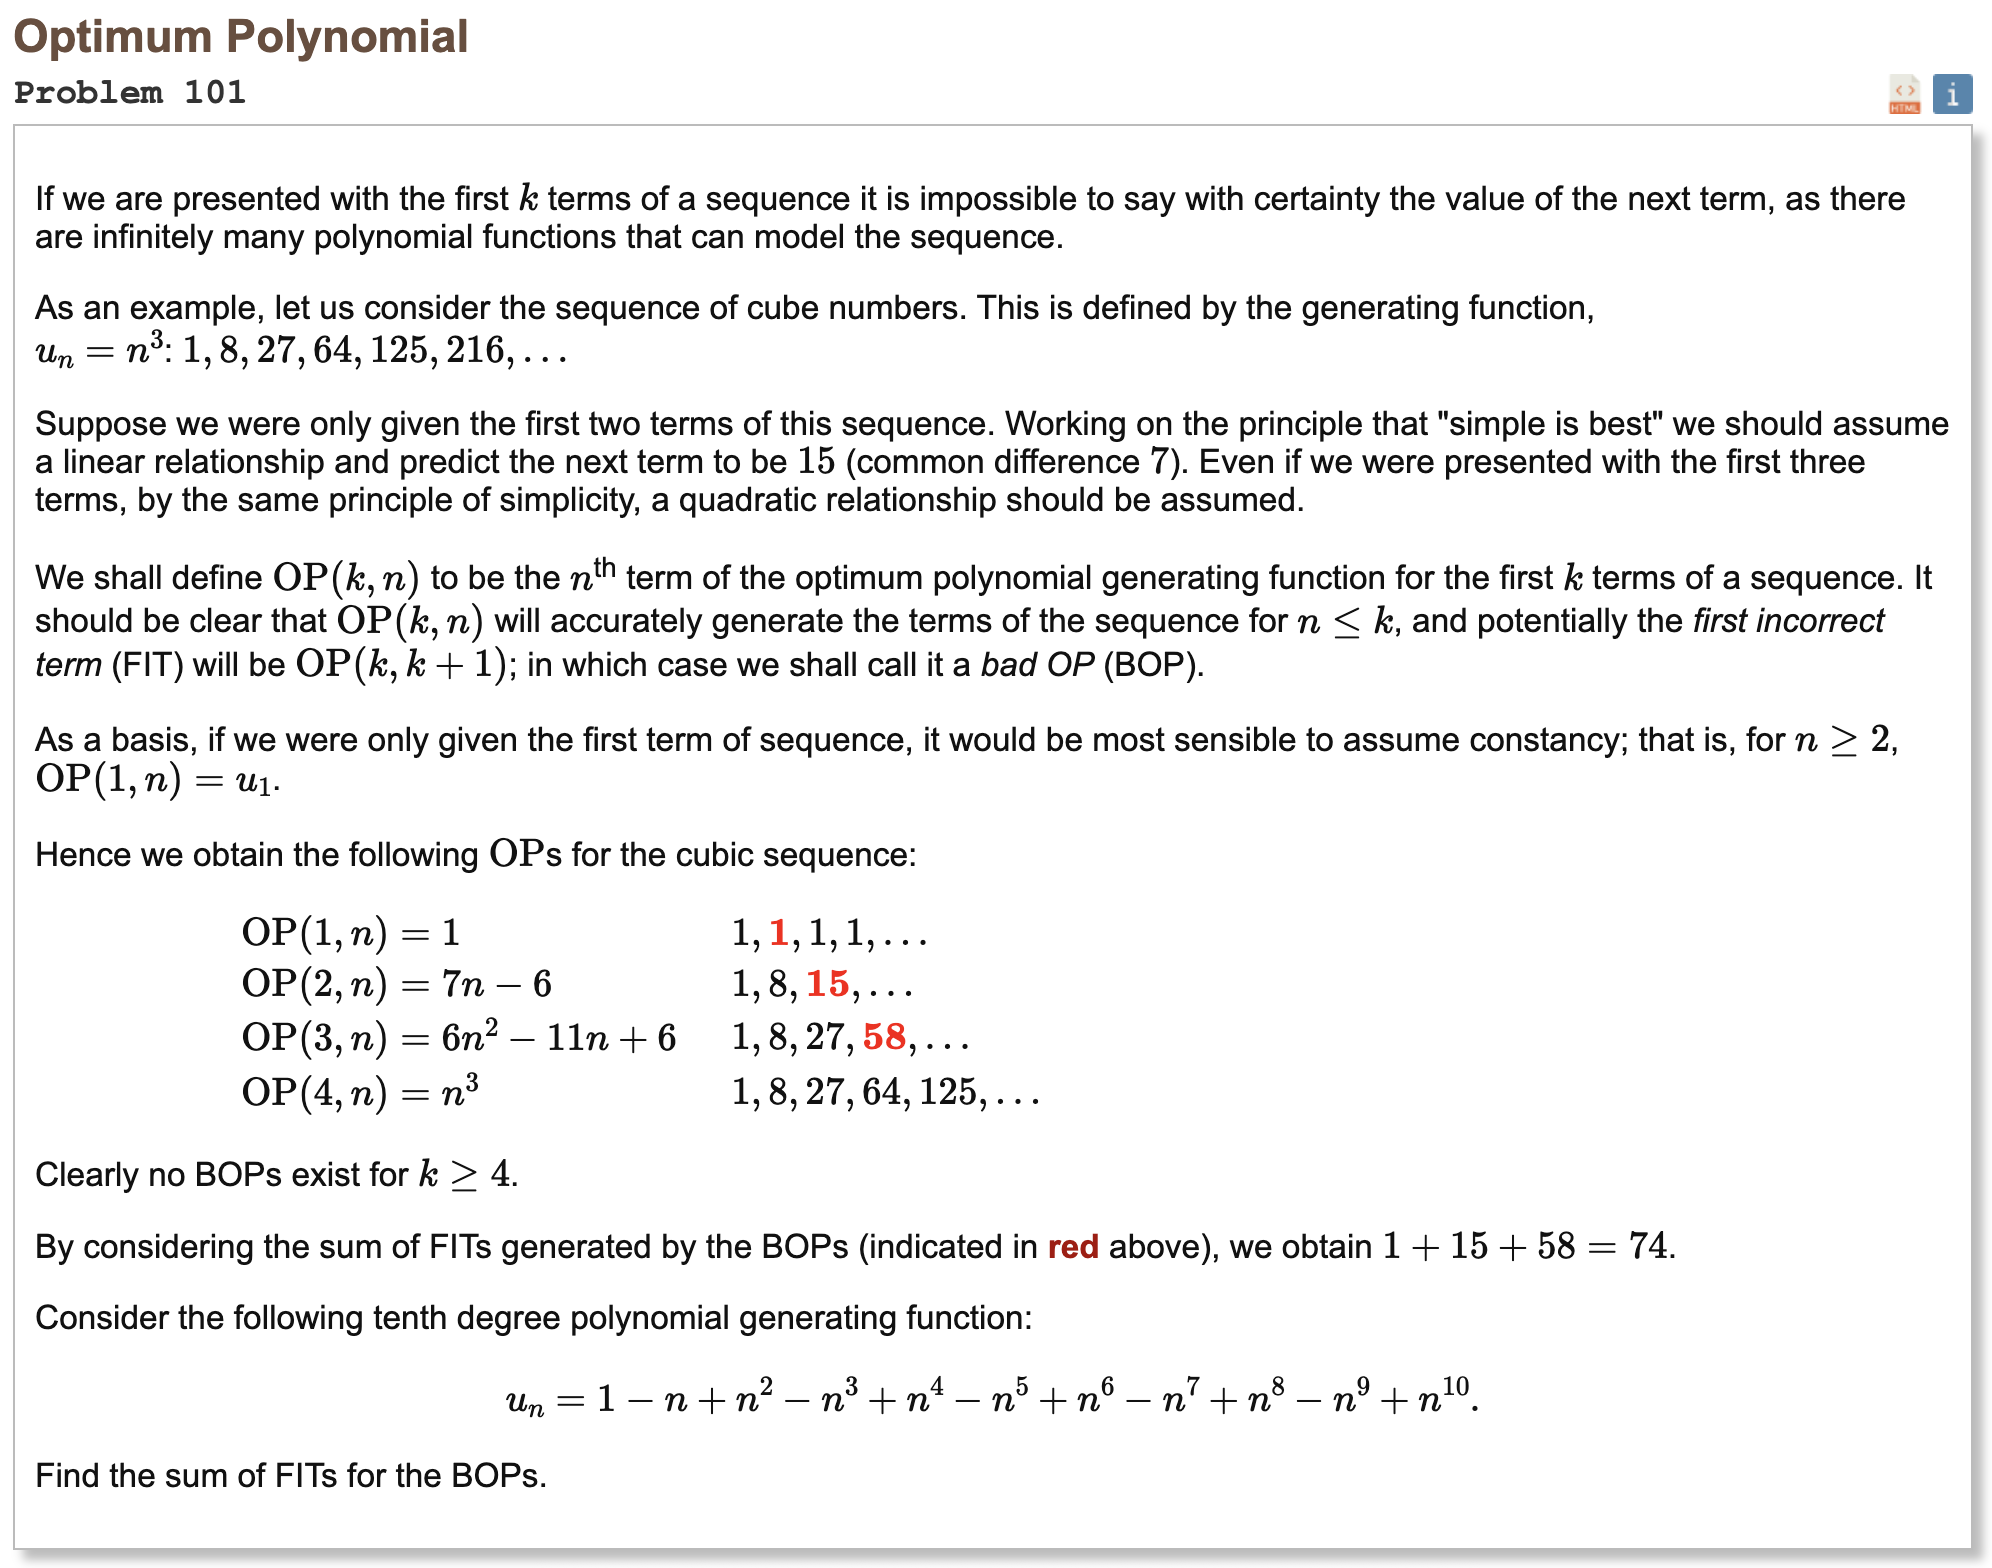

## Initial approach

* this problem looks harder than first 100 euler problems
* we need to generate a sequence
* start with k=1 and take the first k terms
* find lowest degree polynomial that matches these k terms precisely
* predict next term with this polynomial
* this is the FIT: first incorrect term
* repeat for k = 1 to 10
* sum all fit values

First:
* define u function for sequence
* make a list of numbers from 1 to 10
* for each k, calculate (-1)^k = +1
* if k is even → (-1)^k = +1 → term is positive
* if k is odd → (-1)^k = -1 → term is negative
* then we multiply by n^k to get each term’s value

In [1]:
def u(n):
    return sum(((-1)**k) * (n**k) for k in range(11))

Then:

* define fit_polynomial function
* we have some known points: xs and ys values
* we want a polynomial that passes excatly through these points
* for each point i, start with its y value
* multiply by a fraction for every other point j
* skip when i == j
* (x - xs[j]) / (xs[i] - xs[j]) this adjusts the curve to pass all points
* add all these values together
* the final sum is polynomial's value at x

In [2]:
def fit_polynomial(xs, ys, x):
    total = 0
    k = len(xs)
    for i in range(k):
        term = ys[i]
        for j in range(k):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        total += term
    return total

Finally:

* take the first k points and find the polynomial that matches them
* predict the value for k+1 using this polynomial
* add all these predicted values together to get the final sum

In [3]:
%%time

xs = list(range(1, 12))
ys = [u(n) for n in xs]

total_fit_sum = 0
for k in range(1, 11):
    fit_value = fit_polynomial(xs[:k], ys[:k], k + 1)
    total_fit_sum += round(fit_value)

print("Result:", total_fit_sum)

Result: 37076114526
CPU times: user 179 μs, sys: 11 μs, total: 190 μs
Wall time: 186 μs
